In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv("recipes-with-nutrition.csv")
df.head()


,recipe_name,source,url,servings,calories,total_weight_g,image_url,diet_labels,health_labels,cautions,cuisine_type,meal_type,dish_type,ingredient_lines,ingredients,total_nutrients,daily_values,digest
0,Classic Cabbage Slaw with Grandmother Shinn's ...,Food Network,https://www.foodnetwork.com/recipes/classic-ca...,6.0,511.283250,1239.311259,https://datahive-prod-dataset-products.s3.eu-c...,"[""Balanced""]","[""Vegetarian"",""Gluten-Free"",""Peanut-Free"",""Tre...",[],"[""american""]","[""lunch/dinner""]","[""salad""]","[""1 tablespoon kosher salt"",""2 cups water"",""4 ...","[{""food"":""kosher salt"",""text"":""1 tablespoon ko...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":28...."
1,Black Bean Soup,Cookstr,http://www.cookstr.com/recipes/black-bean-soup...,8.0,1850.998990,3339.583230,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Dairy-Free"",""Gluten-Free"",""Egg-Free"",""Peanut...","[""Sulfites""]","[""american""]","[""lunch/dinner""]","[""soup""]","[""1 pound fully cooked bone-in ham steak"",""1 t...","[{""food"":""ham steak"",""text"":""1 pound fully coo...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":77...."
2,Eat for Eight Bucks: Tofu with Tomatoes and Ci...,Serious Eats,http://www.seriouseats.com/recipes/2010/06/eat...,4.0,1643.758565,1453.960928,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber"",""Low-Carb""]","[""Vegan"",""Vegetarian"",""Dairy-Free"",""Egg-Free"",...","[""Gluten"",""Wheat"",""Sulfites""]","[""asian""]","[""lunch/dinner""]","[""main course""]","[""1 pound medium to firm tofu, cut into 1-inch...","[{""food"":""firm tofu"",""text"":""1 pound medium to...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":54...."
3,Fried Chicken Banh Mi,Food Network,https://www.foodnetwork.com/recipes/fried-chic...,4.0,8471.182075,2547.239375,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Peanut-Free"",""Tree-Nut-Free"",""Fish-Free"",""Sh...","[""Gluten"",""Wheat"",""Sulfites""]","[""south east asian""]","[""lunch/dinner""]","[""sandwiches""]","[""Neutral oil, for frying"",""1/2 cup unseasoned...","[{""food"":""oil"",""text"":""Neutral oil, for frying...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":0,""..."
4,The Macaron Frappé,French Revolution Food,http://www.frenchrevolutionfood.com/2013/07/le...,1.0,276.243903,438.762998,https://datahive-prod-dataset-products.s3.eu-c...,[],"[""Vegetarian"",""Peanut-Free"",""Tree-Nut-Free"",""S...","[""Sulfites""]","[""french""]","[""snack""]","[""desserts""]","[""1 macaron (about ½ ounce), in any flavor you...","[{""food"":""macaron"",""text"":""1 macaron (about ½ ...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":47...."


In [3]:
df.dtypes

recipe_name          object
source               object
url                  object
servings            float64
calories            float64
total_weight_g      float64
image_url            object
diet_labels          object
health_labels        object
cautions             object
cuisine_type         object
meal_type            object
dish_type            object
ingredient_lines     object
ingredients          object
total_nutrients      object
daily_values         object
digest               object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39447 entries, 0 to 39446
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recipe_name       39447 non-null  object 
 1   source            39447 non-null  object 
 2   url               39447 non-null  object 
 3   servings          39447 non-null  float64
 4   calories          39447 non-null  float64
 5   total_weight_g    39447 non-null  float64
 6   image_url         39170 non-null  object 
 7   diet_labels       39447 non-null  object 
 8   health_labels     39447 non-null  object 
 9   cautions          39447 non-null  object 
 10  cuisine_type      39447 non-null  object 
 11  meal_type         39447 non-null  object 
 12  dish_type         39447 non-null  object 
 13  ingredient_lines  39447 non-null  object 
 14  ingredients       39447 non-null  object 
 15  total_nutrients   39447 non-null  object 
 16  daily_values      39447 non-null  object

In [5]:
df.columns

Index(['recipe_name', 'source', 'url', 'servings', 'calories',
       'total_weight_g', 'image_url', 'diet_labels', 'health_labels',
       'cautions', 'cuisine_type', 'meal_type', 'dish_type',
       'ingredient_lines', 'ingredients', 'total_nutrients', 'daily_values',
       'digest'],
      dtype='object')

Missing values per column:
 recipe_name           0
source                0
url                   0
servings              0
calories              0
total_weight_g        0
image_url           277
diet_labels           0
health_labels         0
cautions              0
cuisine_type          0
meal_type             0
dish_type             0
ingredient_lines      0
ingredients           0
total_nutrients       0
daily_values          0
digest                0
dtype: int64


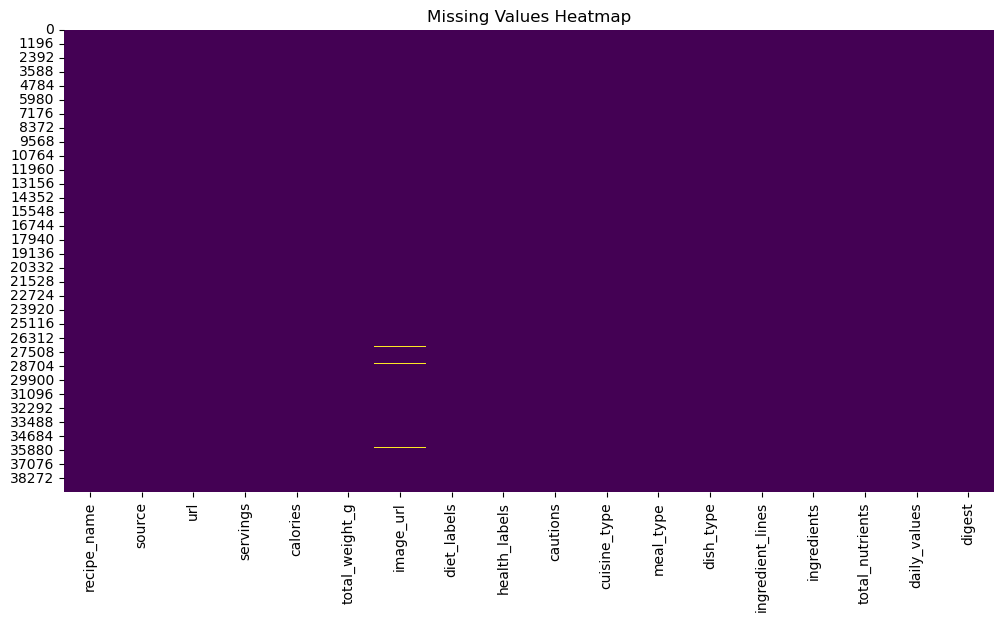

In [6]:
print("Missing values per column:\n", df.isnull().sum())

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
print(df.dtypes)

for col in ['diet_labels', 'health_labels', 'cautions', 'cuisine_type', 'meal_type', 'dish_type']:
    print(f"\n{col} unique values:")
    print(df[col].unique()[:10])


recipe_name          object
source               object
url                  object
servings            float64
calories            float64
total_weight_g      float64
image_url            object
diet_labels          object
health_labels        object
cautions             object
cuisine_type         object
meal_type            object
dish_type            object
ingredient_lines     object
ingredients          object
total_nutrients      object
daily_values         object
digest               object
dtype: object

diet_labels unique values:
['["Balanced"]' '["High-Fiber"]' '["High-Fiber","Low-Carb"]' '[]'
 '["Low-Carb"]' '["Low-Sodium"]' '["Low-Fat","Low-Sodium"]'
 '["High-Fiber","Low-Sodium"]' '["High-Fiber","Low-Fat"]'
 '["Low-Carb","Low-Sodium"]']

health_labels unique values:
['["Vegetarian","Gluten-Free","Peanut-Free","Tree-Nut-Free","Soy-Free","Fish-Free","Shellfish-Free"]'
 '["Dairy-Free","Gluten-Free","Egg-Free","Peanut-Free","Tree-Nut-Free","Soy-Free","Fish-Free","Shellfish-Fre

In [8]:
columns_to_drop = ['source', 'url', 'ingredients', 'daily_values', 'digest']
df_clean = df.drop(columns=columns_to_drop)
df_clean.head()

,recipe_name,servings,calories,total_weight_g,image_url,diet_labels,health_labels,cautions,cuisine_type,meal_type,dish_type,ingredient_lines,total_nutrients
0,Classic Cabbage Slaw with Grandmother Shinn's ...,6.0,511.283250,1239.311259,https://datahive-prod-dataset-products.s3.eu-c...,"[""Balanced""]","[""Vegetarian"",""Gluten-Free"",""Peanut-Free"",""Tre...",[],"[""american""]","[""lunch/dinner""]","[""salad""]","[""1 tablespoon kosher salt"",""2 cups water"",""4 ...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
1,Black Bean Soup,8.0,1850.998990,3339.583230,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Dairy-Free"",""Gluten-Free"",""Egg-Free"",""Peanut...","[""Sulfites""]","[""american""]","[""lunch/dinner""]","[""soup""]","[""1 pound fully cooked bone-in ham steak"",""1 t...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
2,Eat for Eight Bucks: Tofu with Tomatoes and Ci...,4.0,1643.758565,1453.960928,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber"",""Low-Carb""]","[""Vegan"",""Vegetarian"",""Dairy-Free"",""Egg-Free"",...","[""Gluten"",""Wheat"",""Sulfites""]","[""asian""]","[""lunch/dinner""]","[""main course""]","[""1 pound medium to firm tofu, cut into 1-inch...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
3,Fried Chicken Banh Mi,4.0,8471.182075,2547.239375,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Peanut-Free"",""Tree-Nut-Free"",""Fish-Free"",""Sh...","[""Gluten"",""Wheat"",""Sulfites""]","[""south east asian""]","[""lunch/dinner""]","[""sandwiches""]","[""Neutral oil, for frying"",""1/2 cup unseasoned...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
4,The Macaron Frappé,1.0,276.243903,438.762998,https://datahive-prod-dataset-products.s3.eu-c...,[],"[""Vegetarian"",""Peanut-Free"",""Tree-Nut-Free"",""S...","[""Sulfites""]","[""french""]","[""snack""]","[""desserts""]","[""1 macaron (about ½ ounce), in any flavor you...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."


In [9]:
numeric_cols = ['servings', 'calories', 'total_weight_g']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())


In [10]:
def parse_list(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return []

list_cols = ['diet_labels', 'health_labels', 'cautions', 'cuisine_type', 'meal_type', 'dish_type', 'ingredient_lines']
for col in list_cols:
    df_clean[col] = df_clean[col].apply(parse_list)

In [11]:
def extract_nutrients(x):
    protein = fat = carbs = 0.0
    try:
        nutrients = ast.literal_eval(x)
        protein = round(nutrients.get("PROCNT", {}).get("quantity", 0), 2)
        fat     = round(nutrients.get("FAT", {}).get("quantity", 0), 2)
        carbs   = round(nutrients.get("CHOCDF", {}).get("quantity", 0), 2)
    except:
        pass
    return pd.Series([protein, fat, carbs])

df_clean[["protein", "fat", "carbs"]] = df_clean["total_nutrients"].apply(extract_nutrients)


In [12]:
NON_VEG = ["chicken","beef","pork","fish","egg","mutton","shrimp","meat","lamb"]

def detect_food_type(ingredients):
    text = " ".join(ingredients).lower()
    return "non-veg" if any(x in text for x in NON_VEG) else "veg"

df_clean["food_type"] = df_clean["ingredient_lines"].apply(detect_food_type)

In [13]:
df_clean["healthy"] = ((df_clean["calories"] <= 600) & 
                       (df_clean["protein"] >= 10) & 
                       (df_clean["fat"] <= 35)).astype(int)

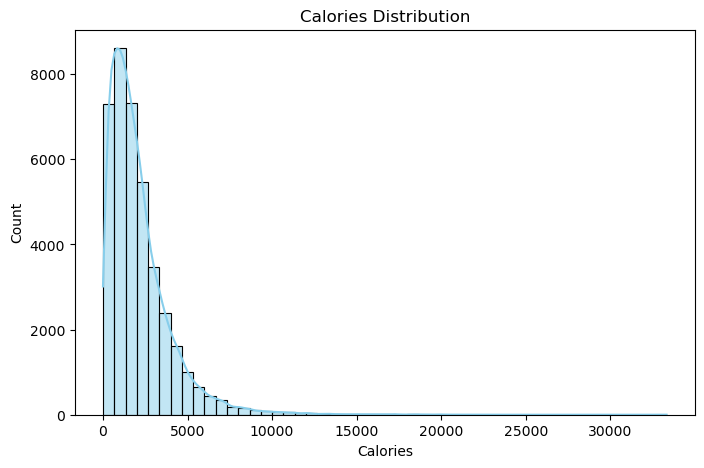

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['calories'], bins=50, kde=True, color='skyblue')
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.show()

In [15]:
df_clean['meal_type_str'] = df_clean['meal_type'].apply(lambda x: ", ".join(x))
top_meals = df_clean['meal_type_str'].value_counts().head(10)

C:\Users\ByeBye\AppData\Local\Temp\ipykernel_16380\4040892023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_meals.index, y=top_meals.values, palette="magma")


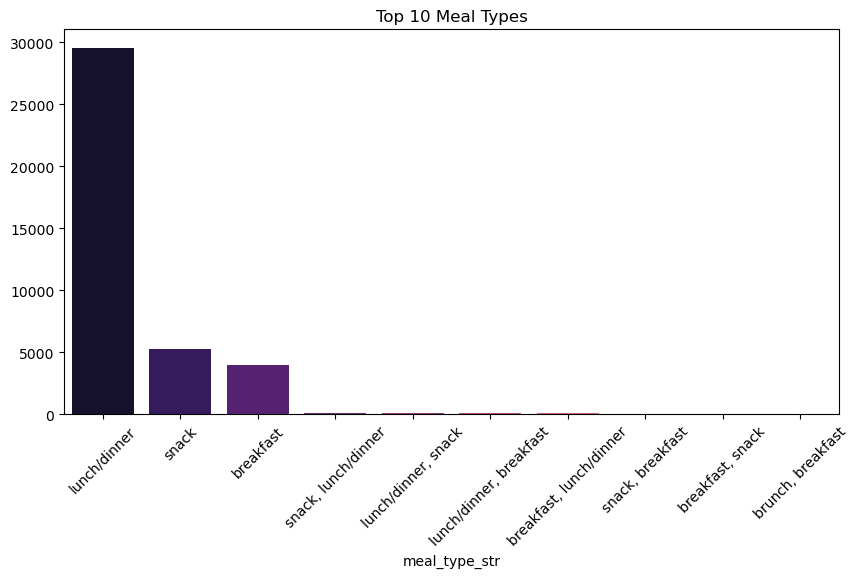

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_meals.index, y=top_meals.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Meal Types")
plt.show()

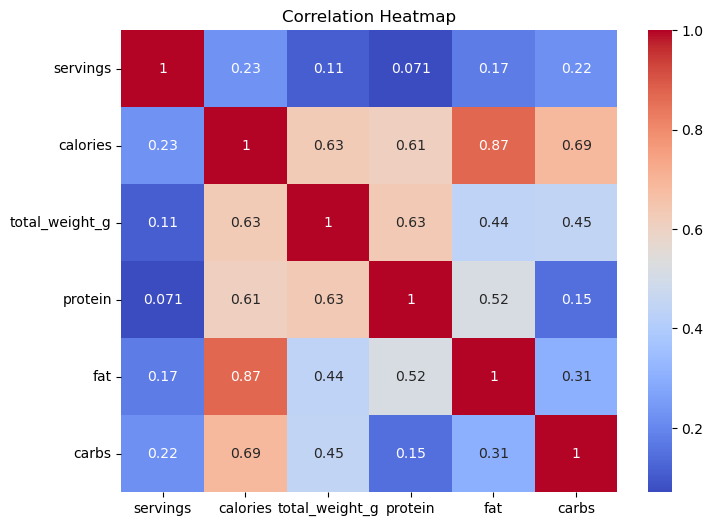

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['servings','calories','total_weight_g','protein','fat','carbs']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

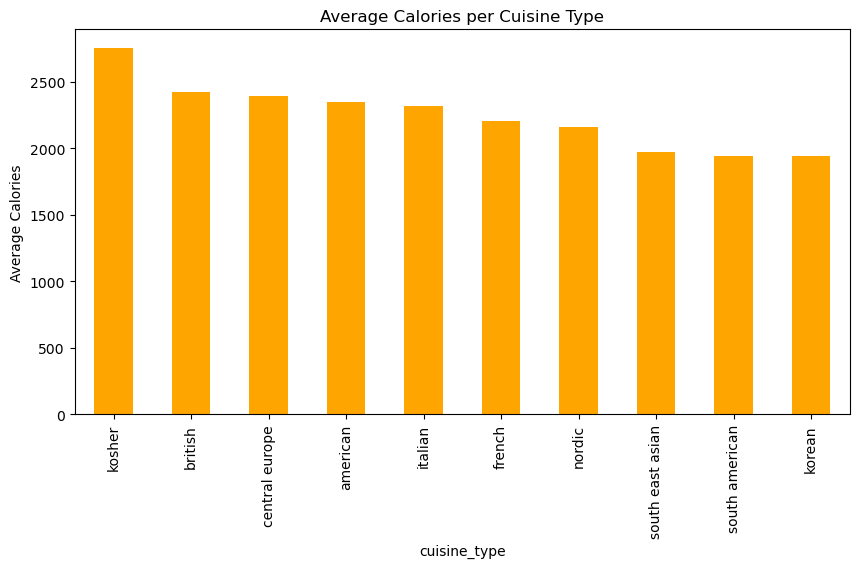

In [18]:
df_clean['cuisine_type_str'] = df_clean['cuisine_type'].apply(lambda x: ", ".join(x))
top_cuisines = df_clean.explode('cuisine_type').groupby('cuisine_type')['calories'].mean().sort_values(ascending=False).head(10)
top_cuisines.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Calories per Cuisine Type")
plt.ylabel("Average Calories")
plt.show()

In [19]:
features = ["calories", "protein", "fat", "carbs"]
X = df_clean[features]
y = df_clean["healthy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 1.0


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

knn_pred = knn_model.predict(X_test_knn)
knn_accuracy = accuracy_score(y_test_knn, knn_pred)

print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9934093789607098


In [22]:
df_clean['ingredients_text'] = df_clean['ingredient_lines'].apply(lambda x: " ".join(x))

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['ingredients_text'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [23]:
def recommend_food(age, height, current_weight, target_weight, food_pref, cuisine):
    # Weight goal logic
    diff = target_weight - current_weight
    if diff < 0:
        calorie_range = (200, 600)
    elif diff > 0:
        calorie_range = (700, 2500)
    else:
        calorie_range = (500, 2000)
        
    # Filter recipes
    filtered_df = df_clean[
        df_clean["food_type"].str.lower() == food_pref.lower()
    ]

    filtered_df = filtered_df[
        filtered_df["calories"].between(*calorie_range)
    ]

    def cuisine_match(cuisines):
        if isinstance(cuisines, list):
            return cuisine.lower() in " ".join(cuisines).lower()
        return False

    filtered_df = filtered_df[
        filtered_df["cuisine_type"].apply(cuisine_match)
    ].copy()

    # Relax cuisine filter if empty
    if filtered_df.empty:
        filtered_df = df_clean[
            (df_clean["food_type"].str.lower() == food_pref.lower()) &
            (df_clean["calories"].between(*calorie_range))
        ].copy()

        if filtered_df.empty:
            return {"breakfast": [], "lunch": [], "dinner": []}

    # KNN Similarity (SAFE)
    if len(filtered_df) < 2:
        return {"breakfast": [], "lunch": [], "dinner": []}

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(filtered_df[features])

    knn = NearestNeighbors(
        n_neighbors=min(15, len(filtered_df)),
        metric="euclidean"
    )
    knn.fit(X_scaled)

    user_df = pd.DataFrame(
        [[np.mean(calorie_range), 25, 25, 50]],
        columns=features
    )

    user_vector = scaler.transform(user_df)

    _, indices = knn.kneighbors(user_vector)
    filtered_df = filtered_df.iloc[indices[0]].copy()

    # Decision Tree 
    filtered_df["healthy_score"] = dt_model.predict(
        filtered_df[features]
    )

    # Content Similarity
    idx_list = filtered_df.index.tolist()

    cosine_sub = cosine_similarity(
        tfidf_matrix[idx_list],
        tfidf_matrix[idx_list]
    )

    filtered_df["similarity_score"] = cosine_sub.mean(axis=1)

    # Final Score
    filtered_df["final_score"] = (
        filtered_df["healthy_score"] +
        filtered_df["similarity_score"]
    )

    filtered_df.sort_values(
        by=["final_score", "protein"],
        ascending=False,
        inplace=True
    )

    # Meal-wise Recommendation
    used_recipes = set()

    def get_meals(meal):
        meal_df = filtered_df[
            filtered_df["meal_type"].apply(
                lambda x: meal in " ".join(x).lower()
            )
        ]

        meal_df = meal_df[
            ~meal_df["recipe_name"].isin(used_recipes)
        ]

        meal_df = meal_df.drop_duplicates(
            "recipe_name"
        ).head(3)

        used_recipes.update(meal_df["recipe_name"])

        meal_df["ingredients"] = meal_df[
            "ingredient_lines"
        ].apply(lambda x: ", ".join(x))

        return meal_df[
            [
                "recipe_name",
                "image_url",
                "calories",
                "protein",
                "fat",
                "carbs",
                "ingredients",
                "cuisine_type"
            ]
        ].to_dict("records")

    return {
        "breakfast": get_meals("breakfast"),
        "lunch": get_meals("lunch"),
        "dinner": get_meals("dinner")
    }


In [24]:

result = recommend_food(
    age=22,
    height=170,
    current_weight=70,
    target_weight=65,
    food_pref="veg",
    cuisine="indian"
)

result


{'breakfast': [{'recipe_name': 'This Mango Lassi Is Our Go-To Drink From Morning to Night',
   'image_url': 'https://datahive-prod-dataset-products.s3.eu-central-1.amazonaws.com/dataset/346/bc60ca6ab81e6c4b476dd0d73c58a7b5fdb7336d3bcf4941b75c5f0cd7121171/21009861.jpg',
   'calories': 400.4666667,
   'protein': 18.4,
   'fat': 16.56,
   'carbs': 48.45,
   'ingredients': '2 cups plain yogurt, 1 cup mango, 1/4 cup water, 2 teaspoons lime juice',
   'cuisine_type': ['indian']},
  {'recipe_name': 'Chai tea',
   'image_url': 'https://datahive-prod-dataset-products.s3.eu-central-1.amazonaws.com/dataset/346/c119dfd8b3faafa95370df918dc8cc04981acf109add12553364c52c03b7d974/20962925.jpg',
   'calories': 365.7,
   'protein': 15.72,
   'fat': 16.74,
   'carbs': 39.3,
   'ingredients': '2 mugs milk (or use almond milk), 2 English Breakfast tea bags, 6 cracked cardamom pods, ½ cinnamon stick, a grating of fresh nutmeg, 2 cloves, 2-4 tsp light brown soft sugar',
   'cuisine_type': ['indian']}],
 'lunc